https://docs.python.org/3/tutorial/modules.html

# Modules and Packages

В этой статье рассматриваются модули Python (modules) и пакеты Python (packages) - два механизма, облегчающие модульное программирование (modular programming).

Модульное программирование - это процесс разбиения большой и громоздкой задачи  на отдельные, более мелкие и управляемые подзадачи или модули. Затем отдельные модули могут быть собраны вместе, как строительные блоки, для создания более крупного приложения.

Модульная структура в большом приложении имеет несколько преимуществ:

* Простота(Simplicity): Вместо того чтобы сосредоточиться на всей проблеме, модуль обычно фокусируется на одной относительно небольшой части проблемы. Если вы работаете над одним модулем, у вас будет меньшая проблемная область, которую вам нужно будет обдумать. Это облегчает разработку и снижает вероятность ошибок.

* Модули обычно разрабатываются таким образом, чтобы они обеспечивали логические границы между различными проблемными областями. Если модули написаны таким образом, что минимизируют взаимозависимость, снижается вероятность того, что изменения в одном модуле повлияют на другие части программы. (Возможно, вы даже сможете вносить изменения в модуль, не имея никаких знаний о приложении за пределами этого модуля). Это делает более жизнеспособной совместную работу над большим приложением для команды из многих программистов.

* Возможность повторного использования (Reusability): Функциональность, определенная в одном модуле, может быть легко использована повторно (через соответствующим образом определенный интерфейс) в других частях приложения. Это устраняет необходимость дублирования кода.

* Масштабирование (Scoping): Модули обычно определяют отдельное пространство имен (namespace), что помогает избежать коллизий между идентификаторами в различных областях программы. (Один из постулатов Дзен Python гласит: "Пространства имен - это одна замечательная идея, давайте делать их больше!").

Функции, модули и пакеты - это все конструкции в Python, которые способствуют "модулизации" кода.

# Python Modules: Overview

Модули Python: Обзор

На самом деле существует три различных способа определения модуля в Python:

1) Модуль может быть написан на самом языке Python.
2) Модуль может быть написан на языке C и загружаться динамически во время выполнения, как, например, модуль re (регулярные выражения).
3) Встроенный модуль встроен в интерпретатор, как, например, модуль itertools.

Доступ к содержимому модуля во всех трех случаях осуществляется одинаково: с помощью оператора import.

Здесь мы сосредоточимся на модулях, написанных на языке Python. Самое замечательное в модулях, написанных на Python, то, что они очень просты в создании. Все, что вам нужно сделать, это создать файл, содержащий  код Python, а затем дать этому файлу имя с расширением .py.

Модули — это файлы Python, не более того. Единственный файл в нашей небольшой программе — это модуль. Два файла Python — это два модуля. Если у нас есть два файла в одной папке, мы можем загрузить класс из одного модуля для использования в другом модуле.

Имя модуля Python — это основа файла; имя без суффикса .py. Файл с именем model.py представляет собой модуль с именем model. 

Например, предположим, что вы создали файл mod.py, содержащий следующее:

In [ ]:
# mod.py
s = "If Comrade Napoleon says it, it must be right."
a = [100, 200, 300]

def foo(arg):
    print(f'arg = {arg}')

class Foo:
    pass

Несколько объектов определены в mod.py:
* s (a string)
* a (a list)
* foo() (a function)
* Foo (a class)

При условии, что mod.py находится в соответствующем месте, о чем вы узнаете в ближайшее время, доступ к этим объектам можно получить, импортировав модуль следующим образом:

```
>>> import mod
>>> print(mod.s)
If Comrade Napoleon says it, it must be right.
>>> mod.a
[100, 200, 300]
>>> mod.foo(['quux', 'corge', 'grault'])
arg = ['quux', 'corge', 'grault']
>>> x = mod.Foo()
>>> x
<mod.Foo object at 0x03C181F0>
```

# The Module Search Path

Путь поиска модуля

Продолжая рассмотренный выше пример, давайте посмотрим, что произойдет, когда Python выполнит statement ("ключевое слово"):
```
import mod
```
Когда интерпретатор выполняет вышеприведенный оператор import, он ищет mod.py в списке директорий, собранном из следующих источников:

* Директория, из которого был запущен входной скрипт, или текущая директория, если интерпретатор запущен в интерактивном режиме.
* Список директорий, содержащихся в переменной окружения PYTHONPATH, если она установлена. (Формат для PYTHONPATH зависит от ОС, но должен имитировать переменную окружения PATH).
* Зависимый от установки список директорий, настроенных во время установки Python

Что такое PYTHONPATH?

Переменная окружения PYTHONPATH используется в Python для указания списка директорий, из которых можно импортировать модули. 

Когда интерпретатор начинает выполнение, он парсит значение этой переменной и кладёт в sys.path.



Чтобы задать эту переменную из командной строки, используйте: set PYTHONPATH=list;of;paths.
Чтобы задать эту переменную из PowerShell, используйте $env:PYTHONPATH=’list;of;paths’ непосредственно перед запуском Python.

Глобальная установка этой переменной через параметры Переменные среды не рекомендуется, так как она может использоваться любой версией Python вместо нужной.

```
import sys
sys.path.append('/tmp/')
```

* Питон ищет модули сперва в текущей директории, потом PYTHONPATH aka sys.path .
* PYTHONPATH и sys.path можно модифицировать, но если можно этого избежать — лучше избежать.
* Если импортируем модуль, то при его импорте выполнится весь код в __init__.py, поэтому лучше не добавлять в этот файл много кода.

Полученный путь поиска доступен в Python переменной sys.path, которая получается из модуля с именем sys:

```
>>> import sys
>>> sys.path
['', 'C:\\Users\\john\\Documents\\Python\\doc', 'C:\\Python36\\Lib\\idlelib',
'C:\\Python36\\python36.zip', 'C:\\Python36\\DLLs', 'C:\\Python36\\lib',
'C:\\Python36', 'C:\\Python36\\lib\\site-packages']
```

Атрибут sys.path модуля sys представляет собой список строк, который указывает путь поиска для модулей. Инициализируется из переменной среды PYTHONPATH, а также зависит от установки по умолчанию.

Атрибут sys.path инициализируется при запуске программы, первый элемент этого списка, path[0] является директорией, содержащей скрипт, который использовался для вызова интерпретатора Python.

Таким образом, чтобы убедиться, что ваш модуль будет найден, вам нужно сделать одно из следующих действий:

* Поместить mod.py в директорию, где находится входной скрипт, или в текущую директорию, если он интерактивный
* Изменить переменную окружения PYTHONPATH так, чтобы она содержала директорию, в котором находится mod.py, перед запуском интерпретатора.
    * Или: Поместите mod.py в одну из директорий, уже содержащихся в переменной PYTHONPATH
* Поместить mod.py в одну из директорий, зависящих от установки, к которым у вас может быть или не быть доступа на запись, в зависимости от ОС.

На самом деле есть еще один дополнительный вариант: вы можете поместить файл модуля в любую директорию по вашему выбору и затем изменить sys.path во время выполнения так, чтобы он содержал эту директорию. Например, в этом случае вы можете поместить mod.py в директорию C:\Users\john, а затем выполнить следующие команды:

```
>>> sys.path.append(r'C:\Users\john')
>>> sys.path
['', 'C:\\Users\\john\\Documents\\Python\\doc', 'C:\\Python36\\Lib\\idlelib',
'C:\\Python36\\python36.zip', 'C:\\Python36\\DLLs', 'C:\\Python36\\lib',
'C:\\Python36', 'C:\\Python36\\lib\\site-packages', 'C:\\Users\\john']
>>> import mod
```

После импорта модуля вы можете определить место, где он был найден, с помощью дандер переменной __file__:

```
>>> import mod
>>> mod.__file__
'C:\\Users\\john\\mod.py'

>>> import re
>>> re.__file__
'C:\\Python36\\lib\\re.py'
```

# The import Statement
Ключевое слово import

Содержимое модуля становится доступным вызывающей стороне с помощью оператора import. 
import имеет множество различных шаблонов, показанных ниже.
## import <имя_модуля>

Самой простой шаблон:
```
import <имя_модуля>
```
Обратите внимание, что это не делает содержимое модуля непосредственно доступным для вызывающей стороны. 
Каждый модуль имеет свою частную таблицу символов (private symbol table), которая служит глобальной таблицей символов для всех объектов, определенных в модуле. Таким образом, модуль создает отдельное пространство имен (namespace), как уже отмечалось.

Оператор import <имя_модуля> только помещает <имя_модуля> в таблицу символов вызывающей стороны. Объекты, определенные в модуле, остаются в личной таблице символов модуля.

Для вызывающей стороны объекты модуля доступны только при наличии префикса <имя_модуля> через точечную нотацию (dot notation), как показано далее.

После вызова import, mod помещается в локальную таблицу символов.

```
>>> import mod
>>> mod
<module 'mod' from 'C:\\Users\\john\\Documents\\Python\\doc\\mod.py'>
```

Но s и foo остаются в частной таблице символов модуля и не имеют смысла в "локальном контексте" (local context):

```
>>> s
NameError: name 's' is not defined
>>> foo('quux')
NameError: name 'foo' is not defined
```

Чтобы к ним можно было обращаться в local context, имена объектов, определенных в модуле, должны иметь префикс mod:

```
>>> mod.s
'If Comrade Napoleon says it, it must be right.'
>>> mod.foo('quux')
arg = quux
```

В одном операторе импорта может быть указано несколько модулей, разделенных запятыми:
```
import <module_name>[, <module_name> ...]
```

## from <module_name> import <name(s)>
Альтернативная форма оператора import позволяет импортировать отдельные объекты из модуля непосредственно в таблицу символов вызывающей программы:

```
from <module_name> import <name(s)>
```

После выполнения вышеприведенного оператора на <name(s)> можно ссылаться в окружении вызывающей стороны без префикса <module_name>:

```
>>> from mod import s, foo
>>> s
'If Comrade Napoleon says it, it must be right.'
>>> foo('quux')
arg = quux

>>> from mod import Foo
>>> x = Foo()
>>> x
<mod.Foo object at 0x02E3AD50>
```

Поскольку при такой форме импорта имена объектов помещаются непосредственно в таблицу символов вызывающей программы, все уже существующие объекты с тем же именем будут перезаписаны:

```
>>> a = ['foo', 'bar', 'baz']
>>> a
['foo', 'bar', 'baz']

>>> from mod import a
>>> a
[100, 200, 300]
```

## from <module_name> import *
Можно даже без разбора импортировать все из модуля одним махом:
```
from <module_name> import *
```

Это поместит имена всех объектов из <имя_модуля> в локальную таблицу символов, за исключением тех, которые начинаются с символа подчеркивания (_).

Например:

```
>>> from mod import *
>>> s
'If Comrade Napoleon says it, it must be right.'
>>> a
[100, 200, 300]
>>> foo
<function foo at 0x03B449C0>
>>> Foo
<class 'mod.Foo'>
```

Это не всегда рекомендуется в крупномасштабном производственном коде. Это немного опасно, потому что вы массово вводите имена в локальную таблицу символов. Если вы не знаете их все и не уверены, что не возникнет конфликта, у вас есть большая вероятность случайно перезаписать существующее имя. Тем не менее, этот синтаксис очень удобен, когда вы просто возитесь с интерактивным интерпретатором, тестируете его или изучаете, поскольку он быстро дает вам доступ ко всему, что может предложить модуль, без необходимости набирать много текста.

## from <module_name> import <name> as <alt_name>

Также можно импортировать отдельные объекты, но ввести их в локальную таблицу символов с альтернативными именами:
```
from <module_name> import <name> as <alt_name>[, <name> as <alt_name> …]
```

Это позволяет помещать имена непосредственно в локальную таблицу символов, избегая при этом конфликтов с ранее существующими именами:

```
>>> s = 'foo'
>>> a = ['foo', 'bar', 'baz']

>>> from mod import s as string, a as alist
>>> s
'foo'
>>> string
'If Comrade Napoleon says it, it must be right.'
>>> a
['foo', 'bar', 'baz']
>>> alist
[100, 200, 300]
```

## import <module_name> as <alt_name>
Вы также можете импортировать весь модуль под альтернативным именем:
```
import <module_name> as <alt_name>
```

```
>>> import mod as my_module
>>> my_module.a
[100, 200, 300]
>>> my_module.foo('qux')
arg = qux
```

Содержимое модуля можно импортировать изнутри определения функции. В этом случае импорт не происходит до вызова функции:

```
>>> def bar():
...     from mod import foo
...     foo('corge')
...

>>> bar()
arg = corge
```

Однако Python 3 не позволяет использовать синтаксис import * внутри функции:

```
>>> def bar():
...     from mod import *
...
SyntaxError: import * only allowed at module level
```

Наконец, для защиты от неудачных попыток импорта можно использовать оператор try с предложением except ImportError:

```
>>> try:
...     # Non-existent module
...     import baz
... except ImportError:
...     print('Module not found')
...

Module not found
```

```
>>> try:
...     # Existing module, but non-existent object
...     from mod import baz
... except ImportError:
...     print('Object not found in module')
...

Object not found in module
```

# The dir() Function

dir(object)
Without arguments, return the list of names in the current local scope. With an argument, attempt to return a list of valid attributes for that object.


Встроенная функция dir() возвращает список объявленых имен в пространстве имен. Без аргументов она выдает отсортированный по алфавиту список имен в текущей локальной таблице символов (local symbol table:):

```
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__']

>>> qux = [1, 2, 3, 4, 5]
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__', 'qux']

>>> class Bar():
...     pass
...
>>> x = Bar()
>>> dir()
['Bar', '__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__', 'qux', 'x']
```

Обратите внимание, как в первом вызове dir() выше перечислены несколько имен, которые автоматически определены и уже находятся в пространстве имен при запуске интерпретатора. По мере определения новых имен (qux, Bar, x) они появляются при последующих вызовах dir().

Это может быть полезно для определения того, что именно было добавлено в пространство имен оператором импорта:

```
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__']

>>> import mod
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__', 'mod']
>>> mod.s
'If Comrade Napoleon says it, it must be right.'
>>> mod.foo([1, 2, 3])
arg = [1, 2, 3]

>>> from mod import a, Foo
>>> dir()
['Foo', '__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__', 'a', 'mod']
>>> a
[100, 200, 300]
>>> x = Foo()
>>> x
<mod.Foo object at 0x002EAD50>

>>> from mod import s as string
>>> dir()
['Foo', '__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__', 'a', 'mod', 'string', 'x']
>>> string
'If Comrade Napoleon says it, it must be right.'
```

Если аргументом является имя модуля, dir() перечисляет имена, определенные в модуле:

```
>>> import mod
>>> dir(mod)
['Foo', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__',
'__name__', '__package__', '__spec__', 'a', 'foo', 's']
```

```
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__']
>>> from mod import *
>>> dir()
['Foo', '__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__', 'a', 'foo', 's']
```

# Executing a Module as a Script
Выполнение модуля как скрипт

Любой .py файл, содержащий модуль, по сути, также является Python скриптом, и нет никаких причин, почему он не может быть выполнен как скрипт.

Здесь снова представлен mod.py в том виде, в котором он был определен выше:

In [ ]:
# mod.py
s = "If Comrade Napoleon says it, it must be right."
a = [100, 200, 300]

def foo(arg):
    print(f'arg = {arg}')

class Foo:
    pass

Это может быть запущено как скрипт:

```
C:\Users\john\Documents>python mod.py
```

Ошибок нет, так что, очевидно, все получилось. Конечно, это не очень интересно. В том виде, в котором она написана, она только определяет объекты. Он ничего не делает с ними и не генерирует никакого вывода.

Давайте изменим приведенный выше модуль Python так, чтобы он генерировал некоторый вывод при запуске в качестве скрипта:

In [ ]:
# mod.py
s = "If Comrade Napoleon says it, it must be right."
a = [100, 200, 300]

def foo(arg):
    print(f'arg = {arg}')

class Foo:
    pass

print(s)
print(a)
foo('quux')
x = Foo()
print(x)

Теперь должно быть немного интереснее:

```
C:\Users\john\Documents>python mod.py
If Comrade Napoleon says it, it must be right.
[100, 200, 300]
arg = quux
<__main__.Foo object at 0x02F101D0>
```

К сожалению, теперь он также генерирует вывод при импорте в качестве модуля:

```
>>> import mod
If Comrade Napoleon says it, it must be right.
[100, 200, 300]
arg = quux
<mod.Foo object at 0x0169AD50>
```

Вероятно, это не то, что вам нужно. Обычно модуль не генерирует вывод при импорте.

Было бы неплохо, если бы вы могли различать, когда файл загружается как модуль и когда он выполняется как отдельный сценарий.

Here we are:

Когда файл .py импортируется как модуль, Python устанавливает специальную дандер-переменную __name__ на имя модуля. Однако если файл запускается как отдельный скрипт, __name__ устанавливается в строку '__main__'. Используя этот факт, вы можете определить, какой из этих случаев имеет место во время выполнения, и соответствующим образом изменить поведение:

In [ ]:
s = "If Comrade Napoleon says it, it must be right."
a = [100, 200, 300]

def foo(arg):
    print(f'arg = {arg}')

class Foo:
    pass

if (__name__ == '__main__'):
    print('Executing as standalone script')
    print(s)
    print(a)
    foo('quux')
    x = Foo()
    print(x)

Теперь, если вы запустите его как скрипт, вы получите вывод:

```
C:\Users\john\Documents>python mod.py
Executing as standalone script
If Comrade Napoleon says it, it must be right.
[100, 200, 300]
arg = quux
<__main__.Foo object at 0x03450690>
```

Но если вы импортируете как модуль, то условие не выполнится:
```
>>> import mod
>>> mod.foo('grault')
arg = grault
```

Модули часто разрабатываются с возможностью запуска в виде отдельного сценария для целей тестирования функциональности, содержащейся в модуле. Это называется юнит тестированием. Например, предположим, что вы создали модуль fact.py, содержащий функцию факториала, следующим образом:

In [ ]:
# fact.py
def fact(n):
    return 1 if n == 1 else n * fact(n-1)

if (__name__ == '__main__'):
    import sys
    if len(sys.argv) > 1:
        print(fact(int(sys.argv[1])))

(sys. argv - список аргументов командной строки, передаваемых сценарию Python. sys. argv[0] является именем скрипта (пустой строкой в интерактивной оболочке).)

Файл можно рассматривать как модуль, а функцию fact() импортировать:

```
>>> from fact import fact
>>> fact(6)
720
```

Но его можно запустить и в автономном режиме, передав в командной строке целочисленный аргумент для тестирования:

```
C:\Users\john\Documents>python fact.py 6
720
```

# Reloading a Module
По соображениям эффективности, модуль загружается только один раз за сеанс работы интерпретатора. Это хорошо для определений функций и классов, которые обычно составляют большую часть содержимого модуля. Но модуль может содержать и другие объекты. Имейте в виду, что эти "утверждения"(statements) будут выполняться только при первом импорте модуля.

Рассмотрим следующий файл mod.py:

In [ ]:
# mod.py
a = [100, 200, 300]
print('a =', a)

Statement print() не выполняется при последующих импортах. (Если уж на то пошло, не выполняется и оператор присваивания, но, как показывает окончательное отображение значения mod.a, это не имеет значения. Как только присваивание сделано, оно сохраняется.)

```
>>> import mod
a = [100, 200, 300]
>>> import mod
>>> import mod

>>> mod.a
[100, 200, 300]
```

Если вы внесли изменения в модуль и вам нужно его перезагрузить, вам нужно либо перезапустить интерпретатор, либо использовать функцию reload() из модуля importlib:

```
>>> import mod
a = [100, 200, 300]

>>> import mod

>>> import importlib
>>> importlib.reload(mod)
a = [100, 200, 300]
<module 'mod' from 'C:\\Users\\john\\Documents\\Python\\doc\\mod.py'>
```

# Python Packages
Пакеты Python

Предположим, что вы разработали очень большое приложение, включающее множество модулей. По мере роста числа модулей становится трудно отслеживать их все, если они собраны в одном месте. Это особенно актуально, если они имеют схожие имена или функциональность. Вам может понадобиться средство для их группировки и организации.

Пакеты позволяют иерархически структурировать пространство имен модулей с помощью точечной нотации. Точно так же, как модули помогают избежать коллизий между именами глобальных переменных, пакеты помогают избежать коллизий между именами модулей.

Создать пакет довольно просто, поскольку он использует присущую операционной системе иерархическую структуру файлов. Рассмотрим следующую схему:

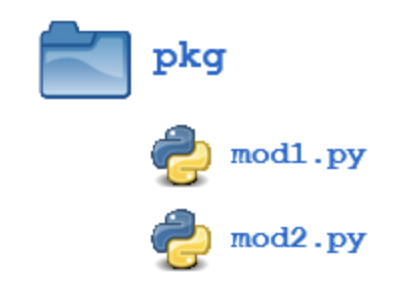

Здесь есть директория с именем pkg, который содержит два модуля, mod1.py и mod2.py. Содержимое модулей следующее:

In [ ]:
# mod1.py

def foo():
    print('[mod1] foo()')

class Foo:
    pass

In [ ]:
# mod2.py

def bar():
    print('[mod2] bar()')

class Bar:
    pass

Учитывая эту структуру, если директория pkg находится в месте, где его можно найти (в одном из каталогов, содержащихся в sys.path), вы можете сослаться на два модуля с помощью точечной нотации (pkg.mod1, pkg.mod2) и импортировать их с помощью уже знакомого вам синтаксиса:
```
import <module_name>[, <module_name> ...]
```

```
>>> import pkg.mod1, pkg.mod2
>>> pkg.mod1.foo()
[mod1] foo()
>>> x = pkg.mod2.Bar()
>>> x
<pkg.mod2.Bar object at 0x033F7290>
```

```
from <module_name> import <name(s)>
```

```
>>> from pkg.mod1 import foo
>>> foo()
[mod1] foo()
```

```
from <module_name> import <name> as <alt_name>
```

```
>>> from pkg.mod2 import Bar as Qux
>>> x = Qux()
>>> x
<pkg.mod2.Bar object at 0x036DFFD0>
```

С помощью этих "утверждений" можно также импортировать модули:
```
from <package_name> import <modules_name>[, <module_name> ...]
from <package_name> import <module_name> as <alt_name>
```

```
>>> from pkg import mod1
>>> mod1.foo()
[mod1] foo()

>>> from pkg import mod2 as quux
>>> quux.bar()
[mod2] bar()
```

Технически вы также можете импортировать пакет:

```
>>> import pkg
>>> pkg
<module 'pkg' (namespace)>
```

Но это малоэффективно. Хотя это, строго говоря, синтаксически корректный оператор Python, он не делает практически ничего полезного. В частности, оно не помещает ни один из модулей в pkg в локальное пространство имен:

```
>>> pkg.mod1
Traceback (most recent call last):
  File "<pyshell#34>", line 1, in <module>
    pkg.mod1
AttributeError: module 'pkg' has no attribute 'mod1'
>>> pkg.mod1.foo()
Traceback (most recent call last):
  File "<pyshell#35>", line 1, in <module>
    pkg.mod1.foo()
AttributeError: module 'pkg' has no attribute 'mod1'
>>> pkg.mod2.Bar()
Traceback (most recent call last):
  File "<pyshell#36>", line 1, in <module>
    pkg.mod2.Bar()
AttributeError: module 'pkg' has no attribute 'mod2'
```

Чтобы действительно импортировать модули или их содержимое, необходимо использовать одну из форм, показанных выше.

# Package Initialization
Инициализация пакета

Если в директории пакета присутствует файл с именем ```__init__.py```, он вызывается при импорте пакета или модуля в пакете. Это может быть использовано для выполнения кода инициализации пакета, например, инициализации данных на уровне пакета.

Например, рассмотрим следующий файл ```__init__.py```:

In [ ]:
# __init__.py
print(f'Invoking __init__.py for {__name__}') # Inviking - Вызов
A = ['quux', 'corge', 'grault']

Давайте добавим этот файл в директорию pkg из приведенного выше примера:

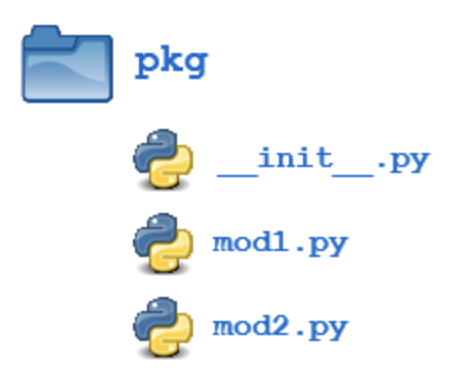

Теперь, когда пакет импортируется, инициализируется глобальный список A:

```
>>> import pkg
Invoking __init__.py for pkg
>>> pkg.A
['quux', 'corge', 'grault']
```

Модуль в пакете может получить доступ к глобальной переменной, импортируя ее в свою очередь:

In [ ]:
# mod1.py
def foo():
    from pkg import A
    print('[mod1] foo() / A = ', A)

class Foo:
    pass

```
>>> from pkg import mod1
Invoking __init__.py for pkg
>>> mod1.foo()
[mod1] foo() / A =  ['quux', 'corge', 'grault']
```

__init__.py также можно использовать для автоматического импорта модулей из пакета. Например, ранее вы видели, что оператор import pkg только помещает имя pkg в локальную таблицу символов вызывающей стороны и не импортирует никаких модулей. Но если __init__.py в каталоге pkg содержит следующее:

In [ ]:
# __init__.py
print(f'Invoking __init__.py for {__name__}')
import pkg.mod1, pkg.mod2

то при выполнении команды import pkg модули mod1 и mod2 импортируются автоматически:

```
>>> import pkg
Invoking __init__.py for pkg
>>> pkg.mod1.foo()
[mod1] foo()
>>> pkg.mod2.bar()
[mod2] bar()
```

Примечание: Во многих документах по Python говорится, что при создании пакета в каталоге пакета должен присутствовать файл __init__.py. Когда-то это было правдой. Раньше само наличие __init__.py означало для Python, что пакет определяется. Файл мог содержать код инициализации или даже быть пустым, но он должен был присутствовать.

Начиная с Python 3.3, были введены неявные пакеты пространства имен. Они позволяют создавать пакет без какого-либо файла __init__.py. Конечно, он все еще может присутствовать, если необходима инициализация пакета. Но он больше не требуется.

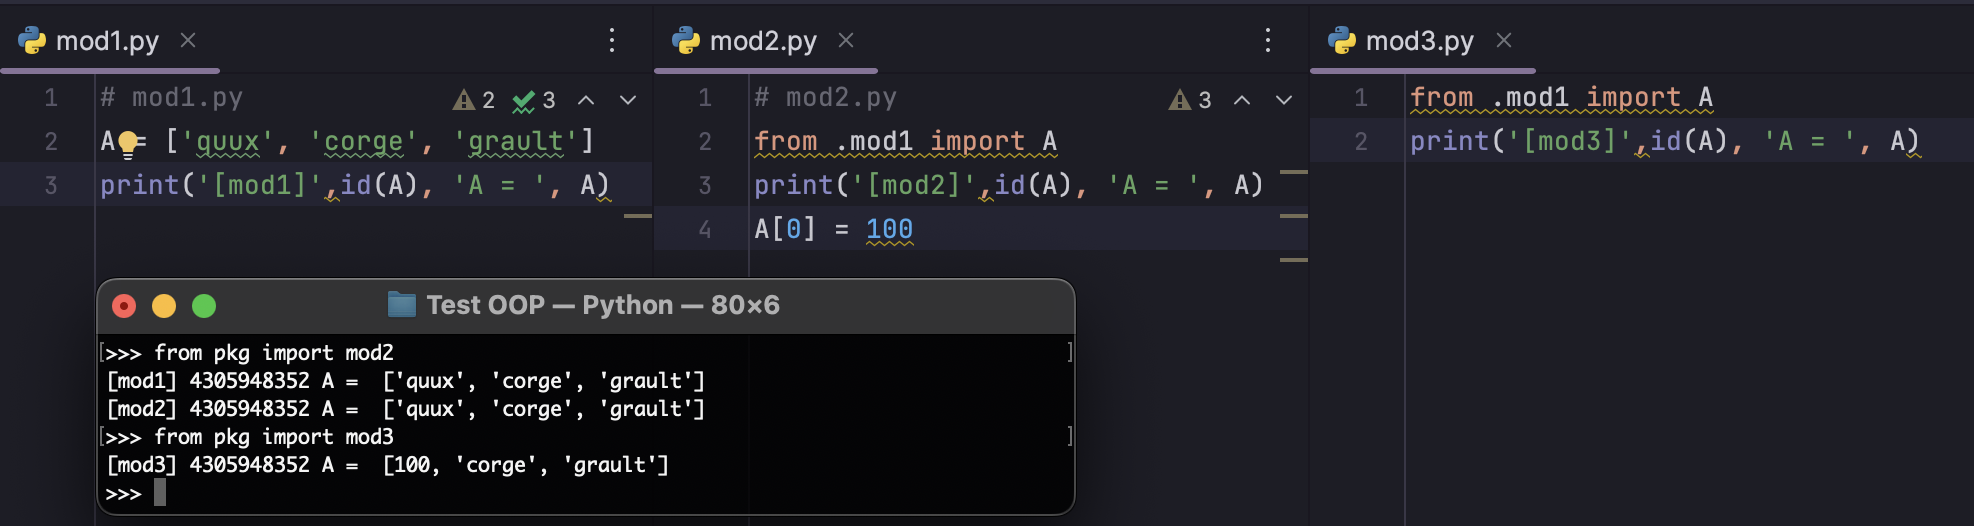

# Importing * From a Package
Для целей следующего обсуждения ранее определенный пакет расширен и содержит некоторые дополнительные модули:

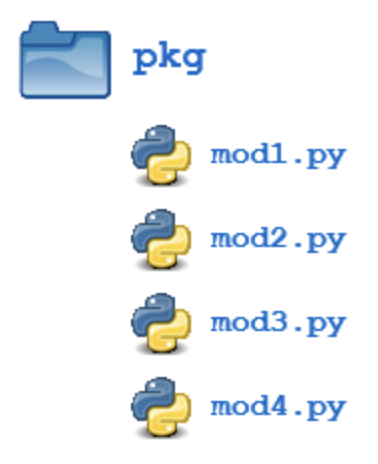

In [ ]:
# mod1.py
def foo():
    print('[mod1] foo()')

class Foo:
    pass

In [ ]:
# mod2.py

def bar():
    print('[mod2] bar()')

class Bar:
    pass

In [ ]:
# mod3.py

def baz():
    print('[mod3] baz()')

class Baz:
    pass

In [ ]:
# mod4.py

def qux():
    print('[mod4] qux()')

class Qux:
    pass

Вы уже видели, что когда для модуля используется import *, все объекты из модуля импортируются в локальную таблицу символов, за исключением тех, чьи имена начинаются с подчеркивания, как всегда:
```
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__']

>>> from pkg.mod3 import *

>>> dir()
['Baz', '__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__', 'baz']
>>> baz()
[mod3] baz()
>>> Baz
<class 'pkg.mod3.Baz'>
```

Аналогично statement для пакета выглядит следующим образом:
```
from <package_name> import *
```

Что это дает?

```
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__']

>>> from pkg import *
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__']
```

Не много. Можно было бы ожидать (если бы у вас вообще были какие-либо ожидания), что Python погрузится в каталог пакетов, найдет все модули, какие только можно, и импортирует их все. Но, как вы видите, по умолчанию так не происходит.

Вместо этого Python следует следующему соглашению: если файл ```__init__.py``` в каталоге пакетов содержит список с именем __all__, он воспринимается как список модулей, которые должны быть импортированы, когда встречается утверждение <имя_пакета> import *.

Для данного примера предположим, что вы создадите ```__init__.py``` в каталоге pkg следующим образом:

In [ ]:
# pkg/__init__.py

__all__ = [
        'mod1',
        'mod2',
        'mod3',
        'mod4'
        ]

Теперь из pkg import * импортирует все четыре модуля:
```
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__']

>>> from pkg import *
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__', 'mod1', 'mod2', 'mod3', 'mod4']
>>> mod2.bar()
[mod2] bar()
>>> mod4.Qux
<class 'pkg.mod4.Qux'>
```

Использование import * все еще не считается потрясающей формой, в большей степени для пакетов, чем для модулей. Но эта возможность, по крайней мере, дает создателю пакета некоторый контроль над тем, что происходит, когда указан импорт *. (Фактически, он дает возможность полностью запретить его, просто отказавшись от определения __all__ вообще. Как вы видели, по умолчанию пакеты ничего не импортируют).

Кстати, ```__all__``` может быть определен и в модуле и служит той же цели: контролировать то, что импортируется с помощью import *. Например, измените mod1.py следующим образом:

In [ ]:
# pkg/mod1.py

__all__ = ['foo']

def foo():
    print('[mod1] foo()')

class Foo:
    pass

Теперь оператор import * из pkg.mod1 будет импортировать только то, что содержится в ```__all__```:

```
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__']

>>> from pkg.mod1 import *
>>> dir()
['__annotations__', '__builtins__', '__doc__', '__loader__', '__name__',
'__package__', '__spec__', 'foo']

>>> foo()
[mod1] foo()
>>> Foo
Traceback (most recent call last):
  File "<pyshell#37>", line 1, in <module>
    Foo
NameError: name 'Foo' is not defined
```

foo() (функция) теперь определена в локальном пространстве имен, а Foo (класс) - нет, потому что последний не входит в ```__all__```.

В общем, ```__all__```используется как пакетами, так и модулями для контроля того, что импортируется, когда указан import *. Но поведение по умолчанию отличается:

* Для пакета, когда ```__all__``` не определен, import * ничего не импортирует.
* Для модуля, когда ```__all__``` не определен, import * импортирует все (кроме - вы угадали - имен, начинающихся с подчеркивания).

# Subpackages
Подпакеты
Пакеты могут содержать вложенные подпакеты произвольной глубины. Например, давайте сделаем еще одну модификацию каталога пакета example следующим образом:

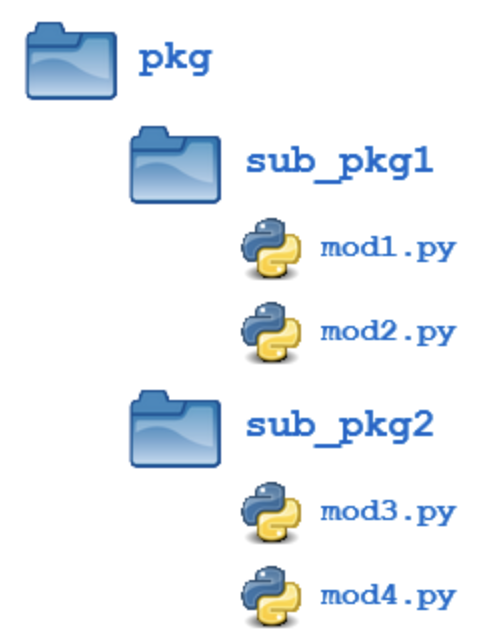

Четыре модуля (mod1.py, mod2.py, mod3.py и mod4.py) определены, как и раньше. Но теперь, вместо того, чтобы быть объединенными в директории pkg, они разделены на два две директории подпакетов, sub_pkg1 и sub_pkg2.

Импорт по-прежнему работает так же, как было показано ранее. Синтаксис аналогичен, но для отделения имени пакета от имени подпакета используется дополнительная точечная нотация:

```
>>> import pkg.sub_pkg1.mod1
>>> pkg.sub_pkg1.mod1.foo()
[mod1] foo()

>>> from pkg.sub_pkg1 import mod2
>>> mod2.bar()
[mod2] bar()

>>> from pkg.sub_pkg2.mod3 import baz
>>> baz()
[mod3] baz()

>>> from pkg.sub_pkg2.mod4 import qux as grault
>>> grault()
[mod4] qux()
```

# Absolute import

Кроме того, модуль в одном подпакете(subpackage) может ссылаться на объекты в другом подпакете(sibling subpackage) (в случае, если этот подпакет содержит какую-то нужную вам функциональность). Например, предположим, вы хотите импортировать и выполнить функцию foo() (определенную в модуле mod1) из модуля mod3. Вы можете использовать либо абсолютный импорт:

In [ ]:
#pkg/sub__pkg2/mod3.py

def baz():
    print('[mod3] baz()')

class Baz:
    pass

from pkg.sub_pkg1.mod1 import foo
foo()

Абсолютный импорт указывает полный путь к модулю, функции или классу, который мы хотим импортировать.

```
>>> from pkg.sub_pkg2 import mod3
[mod1] foo()
>>> mod3.foo()
[mod1] foo()
```

# Relative import

Или вы можете использовать относительный импорт(relative import), где ... ссылается на пакет на один уровень выше. Из mod3.py, который находится в подпакете sub_pkg2,

* .. относится к родительскому пакету (pkg), а
* ..sub_pkg1 относится к подпакету sub_pkg1 родительского пакета.

При работе со связанными модулями внутри глубоко вложенного пакета кажется излишним указывать полный путь; мы знаем, как называется наш родительский модуль.
Именно здесь вступает в действие относительный импорт. Относительный импорт идентифицирует класс, функцию или модуль, поскольку они расположены относительно текущего модуля. Они имеют смысл только внутри файлов модулей, и, кроме того, они имеют смысл только там, где есть сложная структура пакета.

In [ ]:
# pkg/sub__pkg2/mod3.py

def baz():
    print('[mod3] baz()')

class Baz:
    pass

from .. import sub_pkg1
print(sub_pkg1)

from ..sub_pkg1.mod1 import foo
foo()

```
>>> from pkg.sub_pkg2 import mod3
<module 'pkg.sub_pkg1' (namespace)>
[mod1] foo()
```

In [ ]:
from .database import Database 

Точка перед базой данных говорит об использовании модуля базы данных внутри текущего пакета.

Операторы импорта используют оператор точки для разделения пакетов или модулей. Пакет — это пространство имен, содержащее имена модулей, во многом подобно тому, как объект — это пространство имен, содержащее имена атрибутов.

# Как запушить пакет в pypi.org
https://packaging.python.org/en/latest/tutorials/packaging-projects/